#sheth LUJ And Sir MV College

practical no : 09
Aim : Principal Component Analysis (PCA)


*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principal components.
*   Visualize the data in the reduced-dimensional space.




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 0. Setup and Pre-process the Data

In [5]:
data = pd.read_csv("StudentsPerformance.csv")
df = pd.DataFrame(data)

categorical_cols = ['race/ethnicity', 'parental level of education', 'lunch']
numerical_cols = ['math score', 'reading score', 'writing score']
target = df['gender']

features_categorical_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine the new encoded columns with the original numerical columns
features = pd.concat([features_categorical_encoded, df[numerical_cols]], axis=1)

# Standardize the final feature set. This is crucial.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("--- Data Pre-processing Complete ---")
print("Shape after One-Hot Encoding and Combining:", features_scaled.shape)
print("Original features included:", categorical_cols + numerical_cols)

--- Data Pre-processing Complete ---
Shape after One-Hot Encoding and Combining: (1000, 13)
Original features included: ['race/ethnicity', 'parental level of education', 'lunch', 'math score', 'reading score', 'writing score']


# 1. Reducing Features Using Principal Components (PCA)

In [6]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

print("Shape after PCA:", features_pca.shape)
print("Explained Variance Ratio per Component:", pca.explained_variance_ratio_)
print(f"Total Variance Explained by 2 Components: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Shape after PCA: (1000, 2)
Explained Variance Ratio per Component: [0.2286424  0.11029661]
Total Variance Explained by 2 Components: 33.89%


# 2. Reducing Features When Data Is Linearly Inseparable (Kernel PCA)

In [7]:
kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=2)
features_kpca = kpca.fit_transform(features_scaled)

print("Shape after Kernel PCA:", features_kpca.shape)

Shape after Kernel PCA: (1000, 2)


# 3. Reducing Features by Maximizing Class Separability (LDA)

In [8]:
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit_transform(features_scaled, target)

print("Shape after LDA:", features_lda.shape)

Shape after LDA: (1000, 1)


# 4. Visualize Data Before and After PCA

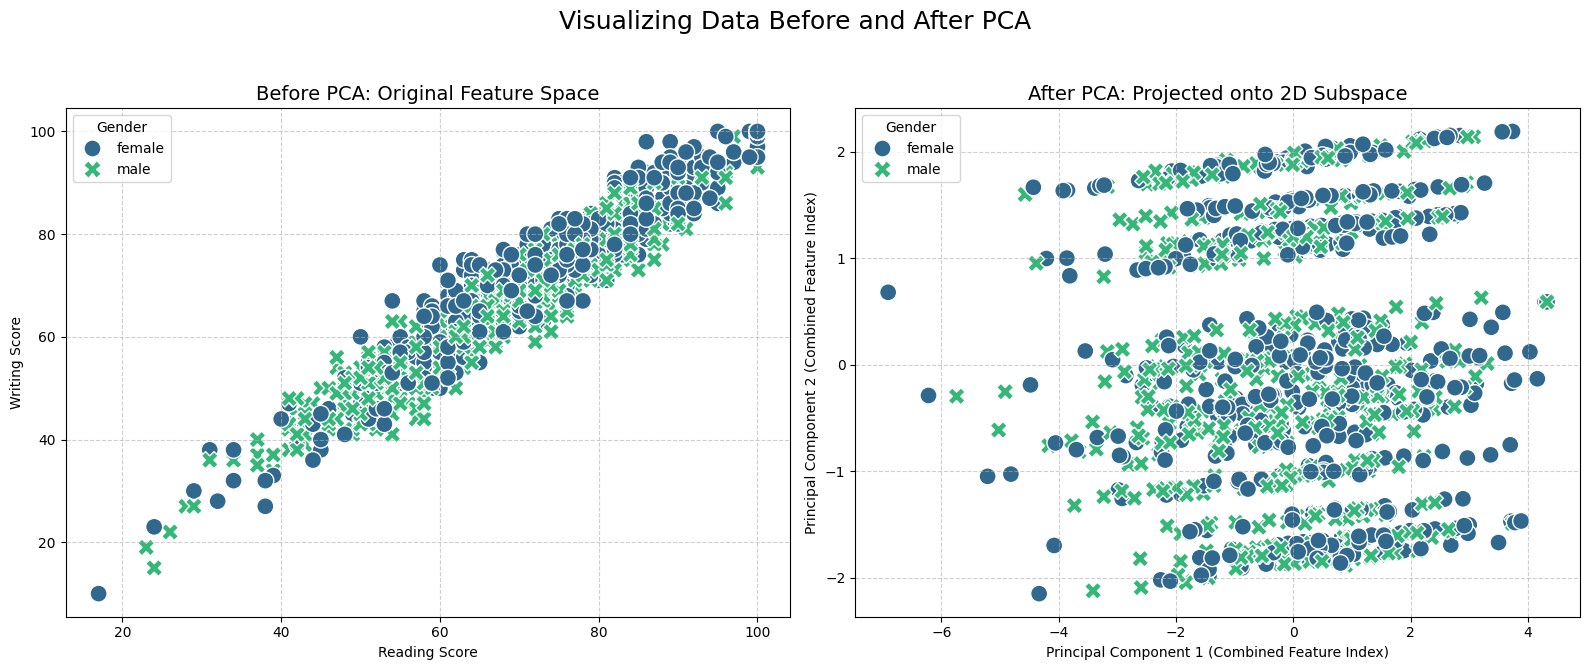

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Visualizing Data Before and After PCA', fontsize=18)

# --- Plot 1: Before PCA ---
# We plot two of the original numerical columns to represent the "before" state
sns.scatterplot(
    x=df['reading score'],
    y=df['writing score'],
    hue=target,
    style=target,
    s=150,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Before PCA: Original Feature Space', fontsize=14)
axes[0].set_xlabel('Reading Score')
axes[0].set_ylabel('Writing Score')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(title='Gender')

# --- Plot 2: After PCA ---
df_pca = pd.DataFrame({
    'Principal Component 1': features_pca[:, 0],
    'Principal Component 2': features_pca[:, 1],
    'gender': target
})
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='gender',
    style='gender',
    data=df_pca,
    s=150,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('After PCA: Projected onto 2D Subspace', fontsize=14)
axes[1].set_xlabel('Principal Component 1 (Combined Feature Index)')
axes[1].set_ylabel('Principal Component 2 (Combined Feature Index)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(title='Gender')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()